In [1]:
from google.colab import files
uploaded = files.upload()  # Upload archive (59).zip

Saving archive (59).zip to archive (59).zip


In [2]:
import zipfile
import os

zip_path = "archive (59).zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check the extracted structure
os.listdir(extract_path)


['modified-dataset']

In [4]:
os.listdir("/content/dataset")


['modified-dataset']

In [5]:
train_dir = "/content/dataset/modified-dataset/train"
val_dir = "/content/dataset/modified-dataset/val"
test_dir = "/content/dataset/modified-dataset/test"


In [7]:
# importing required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
# Data preprocessing with Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)


Found 2400 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [33]:
#Build Model with MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


/tmp/ipython-input-33-2108227658.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


In [34]:
#Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 72s 868ms/step - accuracy: 0.1516 - loss: 2.8123 - val_accuracy: 0.6433 - val_loss: 1.3462
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 62s 822ms/step - accuracy: 0.4794 - loss: 1.5313 - val_accuracy: 0.8233 - val_loss: 0.8300
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 63s 831ms/step - accuracy: 0.6256 - loss: 1.1500 - val_accuracy: 0.8667 - val_loss: 0.5945
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 82s 844ms/step - accuracy: 0.7228 - loss: 0.8810 - val_accuracy: 0.8933 - val_loss: 0.4688
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.7554 - loss: 0.7525 - val_accuracy: 0.8967 - val_loss: 0.3974
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7724 - loss: 0.6967 - val_accuracy: 0.9133 - val_loss: 0.3398
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 66s 872ms/step - accuracy: 0.8209 - loss: 0.5627 - val_accuracy: 0.9100 - val_loss: 0.3102
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 67s 891ms/step - accuracy: 0.8067 - loss: 0.5845 - val_accuracy: 

In [36]:
#Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 641ms/step - accuracy: 0.8963 - loss: 0.3470
Test Accuracy: 0.91


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 659ms/step


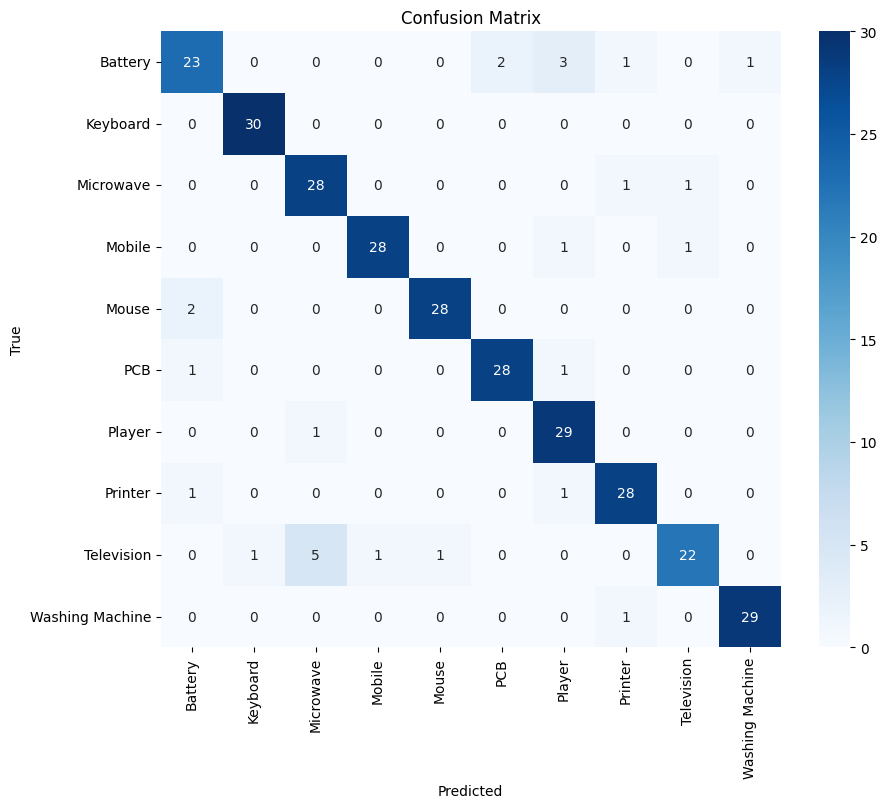

                 precision    recall  f1-score   support

        Battery       0.85      0.77      0.81        30
       Keyboard       0.97      1.00      0.98        30
      Microwave       0.82      0.93      0.88        30
         Mobile       0.97      0.93      0.95        30
          Mouse       0.97      0.93      0.95        30
            PCB       0.93      0.93      0.93        30
         Player       0.83      0.97      0.89        30
        Printer       0.90      0.93      0.92        30
     Television       0.92      0.73      0.81        30
Washing Machine       0.97      0.97      0.97        30

       accuracy                           0.91       300
      macro avg       0.91      0.91      0.91       300
   weighted avg       0.91      0.91      0.91       300



In [37]:
# Confusion Matrix & Classification Report
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
pred_probs = model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_labels))


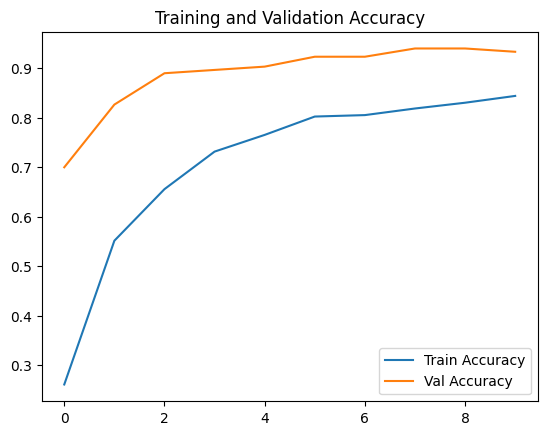

In [31]:
#Plot Training Results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
